<a href="https://colab.research.google.com/github/socratesjnr/asuu-strike-project/blob/main/Students_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Email Generator
This program generates a student emails for Unilag students based on their distribution by faculties levels, and departments.        

In [46]:
import pandas as pd


faculty_conditions = {
                        'faculty': ['Arts', 'Basic Medical Sciences',
                                    'Clincal Sciences', 'Dental Sciences',
                                    'Education', 'Engineering',
                                    'Environmental Sciences', 'Law',
                                    'Management Sciences', 'Pharmacy',
                                    'Science', 'Social Sciences'],
                        'student_count': [3750, 520, 1900, 510, 6900, 3600,
                                          1300, 1900, 4300, 900, 5300, 3600],
                        'faculty_code': ['01', '09', '07', '10', '03', '04', '05', '06', '02', '12', '08', '11'],
                        'levels': [4, 6, 6, 6, 4, 5, 5, 5, 4, 6, 4, 4]
                        }

department_codes ={
            '01':['01', '02', '03', '04', '05', '06'],
            '02':['01', '02', '03', '04', '05'],
            '03':['01', '02', '03', '04', '05', '06'],
            '04':['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'],
            '05':['01', '02', '03', '04', '05'],
            '06':['01'],
            '07':['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12','13'],
            '08':['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11'],
            '09':['01', '02', '03', '04', '05', '06'],
            '10':['01', '02', '03', '04', '05', '06'],
            '11':['01', '02', '03', '04', '05', '06'],
            '12':['01', '02', '03', '04', '05', '06']
            }


faculty_df = pd.DataFrame(faculty_conditions)
faculty_df['dept_codes'] = faculty_df['faculty_code'].map(
    department_codes)
faculty_df['num_of_dept'] = faculty_df['dept_codes'].apply(lambda x: len(x))
faculty_df['student_per_dept'] = round(faculty_df['student_count'] / faculty_df['num_of_dept'])
faculty_df['student_per_dept_per_level'] = round(
    faculty_df['student_per_dept']/faculty_df['levels'])
faculty_df                                    

,faculty,student_count,faculty_code,levels,dept_codes,num_of_dept,student_per_dept,student_per_dept_per_level
0,Arts,3750,01,4,"[01, 02, 03, 04, 05, 06]",6,625.0,156.0
1,Basic Medical Sciences,520,09,6,"[01, 02, 03, 04, 05, 06]",6,87.0,14.0
2,Clincal Sciences,1900,07,6,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 1...",13,146.0,24.0
3,Dental Sciences,510,10,6,"[01, 02, 03, 04, 05, 06]",6,85.0,14.0
4,Education,6900,03,4,"[01, 02, 03, 04, 05, 06]",6,1150.0,288.0
5,Engineering,3600,04,5,"[01, 02, 03, 04, 05, 06, 07, 08, 09, 10]",10,360.0,72.0
6,Environmental Sciences,1300,05,5,"[01, 02, 03, 04, 05]",5,260.0,52.0
7,Law,1900,06,5,[01],1,1900.0,380.0
8,Management Sciences,4300,02,4,"[01, 02, 03, 04, 05]",5,860.0,215.0
9,Pharmacy,900,12,6,"[01, 02, 03, 04, 05, 06]",6,150.0,25.0


Generate emails for students based on criteria

Format: "AABBCCXXX@live.unilag.edu.ng".

Where AA=Admission year,
    BB=Faculty code,
    CC=Department code,
    XXX=Student Serial Number


In [53]:
emails = [f"{year}{row['faculty_code']}{dept_code}{id}@live.unilag.edu.ng"
          for index, row in faculty_df.iterrows()
          for dept_code in row['dept_codes']
          for year in range(16, 17 + row['levels'])
          for id in [f'{str(id).zfill(3)}' for id in range(1, int(row['student_per_dept_per_level']) + 1)] + ['501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512']
          if not (year == 16 and row['levels'] < 5)]
len(emails)

41794

Test

In [54]:
'170401007@live.unilag.edu.ng' in emails

True

## Classify emails
Create a dataframe housing the emails and their respective faculties

In [56]:
def classify_email(student_email):
    faculty_codes = {
        '01': 'Arts',
        '02': 'Management Sciences',
        '03': 'Education',
        '04': 'Engineering',
        '05': 'Environmental Sciences',
        '06': 'Law',
        '07': 'Clinical Sciences',
        '08': 'Science',
        '09': 'Basic Medical Sciences',
        '10': 'Dental Sciences',
        '11': 'Social Sciences',
        '12': 'Pharmacy'
    }
    faculty_code = student_email[2:4]
    return faculty_codes.get(faculty_code, 'unknown')


Verify whether distriution matches expected

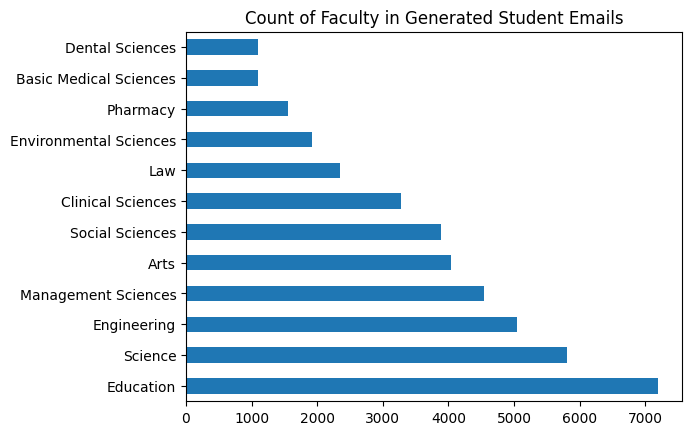

In [57]:
email_df = pd.DataFrame(emails)
email_df.columns = ['student_email']
email_df['faculty'] = email_df['student_email'].apply(classify_email)

email_df['faculty'].value_counts().plot(kind='barh', title='Count of Faculty in Generated Student Emails');

Create CSV of DataFrame

In [58]:
email_df.to_csv('student_emails.csv', index=False)